1. Import Required Libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits, fetch_olivetti_faces
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sns.set(style="whitegrid")


2. Load the Dataset
Option A: Digits Dataset (Recommended for Speed)

In [2]:
digits = load_digits()
X = digits.data
y = digits.target
print(f"Digits Data Shape: {X.shape}")  # Should be (1797, 64)


Digits Data Shape: (1797, 64)


Option B: Faces Dataset (Higher Dimensional, Slower)

In [3]:
faces = fetch_olivetti_faces()
X = faces.data
y = faces.target
print(f"Faces Data Shape: {X.shape}")  # Should be (400, 4096)


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/liu/scikit_learn_data
Faces Data Shape: (400, 4096)


3. Scale the Data

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


4. Apply PCA
Choosing the Number of Components

In [5]:
# PCA for 2D Visualization
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# PCA for Variance Analysis
pca_full = PCA().fit(X_scaled)
explained_variance_ratio = pca_full.explained_variance_ratio_


5. Visualize the PCA Results
Variance Explained by Components

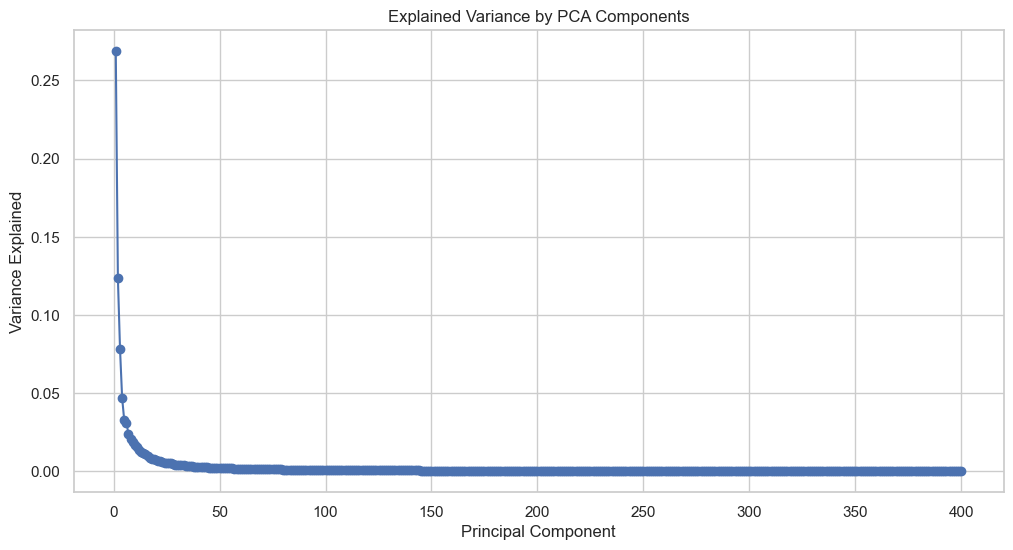

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.title("Explained Variance by PCA Components")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.show()


The first few components capture the majority of the variance.

The curve flattens quickly after the first 20 components, indicating diminishing returns for additional components.

The first component alone captures more than 25% of the variance, while the top 10 components capture most of the meaningful structure in the data.

This suggests the data is highly redundant, and many features can be combined without significant information loss.

2D Projection

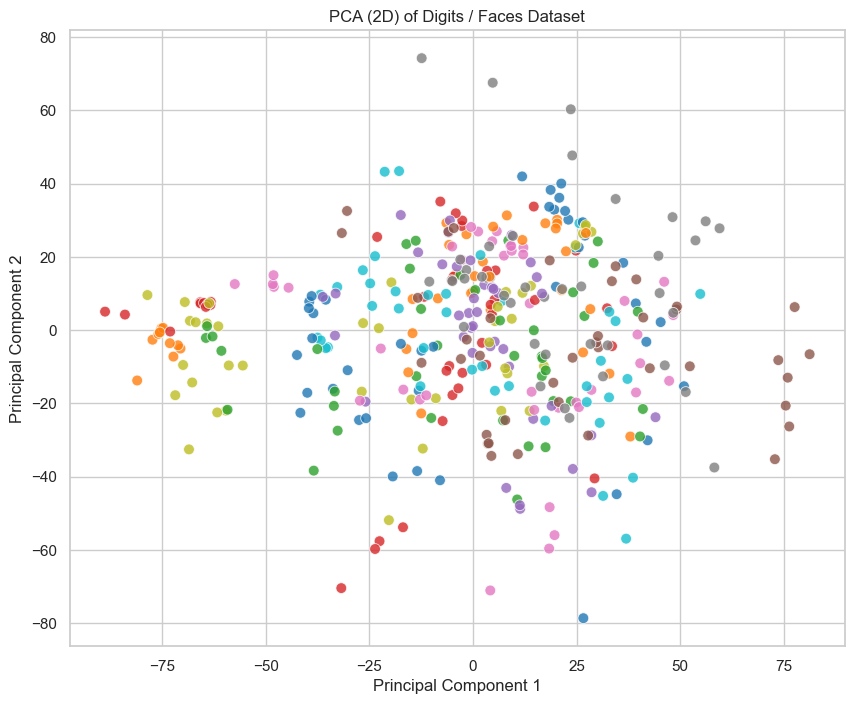

In [7]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca_2d[:, 0], y=X_pca_2d[:, 1], hue=y, palette="tab10", s=60, alpha=0.8, legend=None)
plt.title("PCA (2D) of Digits / Faces Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


Data points are well spread out, suggesting that the PCA effectively captures the high-dimensional relationships in a low-dimensional space.

Clusters are present, but some overlap exists, reflecting the complex nature of face data.

The variation along PC1 and PC2 captures major facial differences, potentially related to age, lighting, or pose.

6. Visualize Top PCA Components 

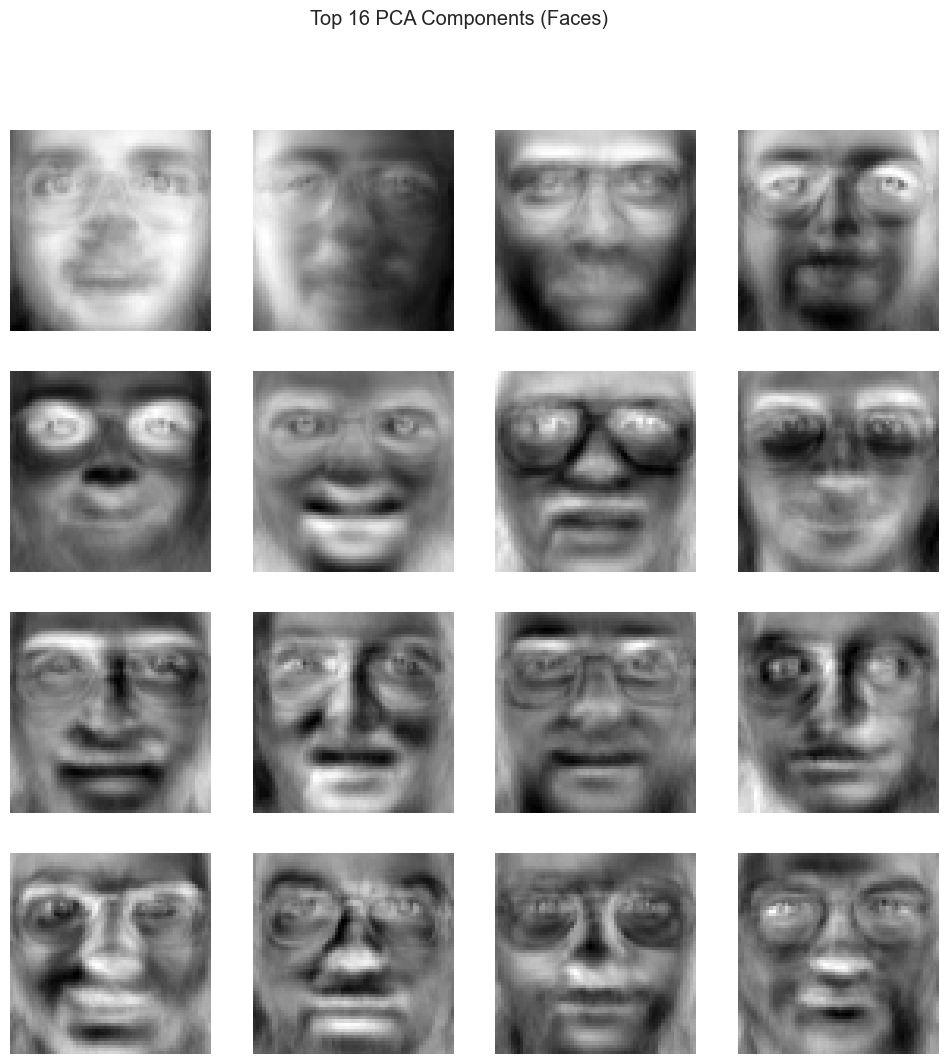

In [8]:
if X.shape[1] == 4096:  # Only for faces
    components = pca_full.components_[:16]
    fig, axes = plt.subplots(4, 4, figsize=(12, 12))
    for i, ax in enumerate(axes.flat):
        ax.imshow(components[i].reshape(64, 64), cmap='gray')
        ax.axis("off")
    plt.suptitle("Top 16 PCA Components (Faces)")
    plt.show()


In [9]:
import pandas as pd

# Save the 2D PCA projections
pca_df = pd.DataFrame(X_pca_2d, columns=["PC1", "PC2"])
pca_df["label"] = y
pca_df.to_csv("pca_digits_or_faces.csv", index=False)

print("PCA results saved as pca_digits_or_faces.csv")


PCA results saved as pca_digits_or_faces.csv


The components capture global facial features like glasses, facial structure, and shadow patterns.

The first few components are sharper and capture more general features (e.g., glasses, head shape).

Later components capture finer, more local features, like wrinkles and eye shape.

These components form the basis of the PCA transformation, allowing the original high-dimensional faces to be compressed effectively.